# Helper function to draw the puzzle state

In [38]:
def draw_puzzle(puzzle, step):
    plt.imshow(np.zeros((3, 3)), cmap='gray')  # Create an empty grid
    for i in range(3):
        for j in range(3):
            plt.text(j, i, str(puzzle[i][j]), fontsize=22, ha='center', va='center', color='blue')

Text(0.5, 1.0, 'Step 19')

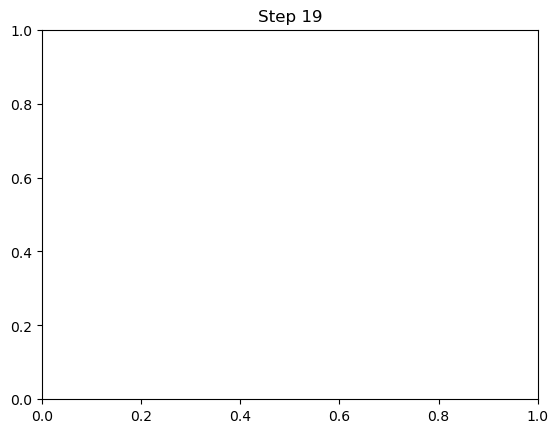

In [39]:
    plt.title(f'Step {step}')

([], [])

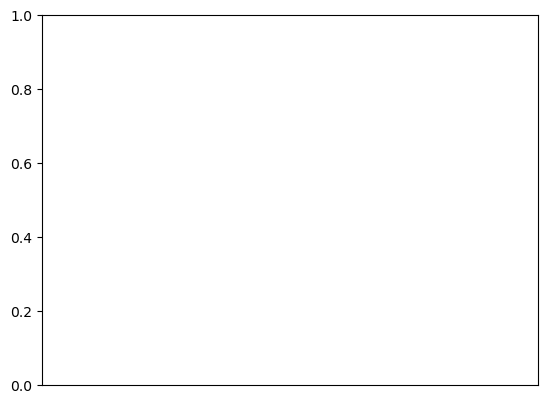

In [40]:
    plt.xticks([])  # Remove x-axis ticks

([], [])

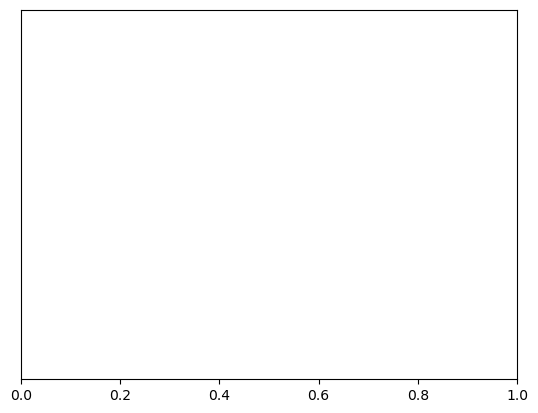

In [41]:
    plt.yticks([])  # Remove y-axis ticks

In [42]:
    plt.show()

# Function to check if the current state is solvable

In [43]:
def is_solvable(puzzle):
    flat_puzzle = [num for row in puzzle for num in row if num != 0]
    inversions = 0
    for i in range(len(flat_puzzle)):
        for j in range(i + 1, len(flat_puzzle)):
            if flat_puzzle[i] > flat_puzzle[j]:
                inversions += 1
    return inversions % 2 == 0

# A* algorithm for solving the 8-puzzle problem

In [44]:
def a_star(initial_state):
    def h(state):
        # Manhattan distance heuristic
        distance = 0
        for i in range(3):
            for j in range(3):
                num = state[i][j]
                if num != 0:
                    correct_i, correct_j = divmod(num - 1, 3)
                    distance += abs(i - correct_i) + abs(j - correct_j)
        return distance

In [46]:
def neighbors(state):
        # Find the empty spot (represented by 0)
        for i in range(3):
            for j in range(3):
                if state[i][j] == 0:
                    empty_i, empty_j = i, j
                    break
        # Generate valid moves (up, down, left, right)
        for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_i, new_j = empty_i + di, empty_j + dj
            if 0 <= new_i < 3 and 0 <= new_j < 3:
                new_state = deepcopy(state)
                new_state[empty_i][empty_j], new_state[new_i][new_j] = new_state[new_i][new_j], new_state[empty_i][empty_j]
                yield new_state

    start_state = initial_state
    goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

    # Priority queue for A* search (cost, state, steps taken)
    pq = PriorityQueue()
    pq.put((h(start_state), 0, start_state, []))  # (cost, g, state, path)
    seen = set()

    while not pq.empty():
        _, g, current_state, path = pq.get()

        if current_state == goal_state:
            return path + [current_state]

        seen.add(tuple(map(tuple, current_state)))

        for neighbor in neighbors(current_state):
            if tuple(map(tuple, neighbor)) not in seen:
                pq.put((g + 1 + h(neighbor), g + 1, neighbor, path + [current_state]))

# Randomly shuffle the puzzle
def random_puzzle():
    puzzle = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
    while True:
        random.shuffle(puzzle)
        if is_solvable(puzzle):
            return puzzle

# Initialize a random 8-puzzle
initial_puzzle = random_puzzle()

# Visualize the initial puzzle state
draw_puzzle(initial_puzzle, 0)

# Solve the puzzle and visualize each step
solution_path = a_star(initial_puzzle)
for step, state in enumerate(solution_path):
    draw_puzzle(state, step + 1)

IndentationError: unindent does not match any outer indentation level (<string>, line 16)